# Logistic Regression
### predicting the MBTI type of a hate speech dataset during the MeToo debate
code basis by Dr. Ernesto: https://drlee.io/text-preprocessing-and-classification-with-logistic-regression-ea4fe3cfcaac

In [1]:
import pandas as pd
import re

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer, uniform
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
nltk.download('wordnet')
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\svcsc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Preprocess the data

In [3]:
def preprocess(text):
    text = text.lower()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [ ]:
def clean_text(text):
    return text.lower()

In [ ]:
data1 = pd.read_csv('mbti_twitter.csv', sep="\t", lineterminator='\n')

In [8]:
data = pd.read_csv('mbti_portal_preprocessed.csv', sep="\t", index_col=0)
data

,type,tweets,ID
0,INFJ,enfp and intj moments sportscenter not top ...,0
1,ENTP,Im finding the lack of me in these posts very ...,1
2,INTP,Good one Of course to which I say I know t...,2
3,INTJ,Dear INTP I enjoyed our conversation the oth...,3
4,ENTJ,Youre firedThats another silly misconception T...,4
...,...,...,...
8670,ISFP,IxFP just because I always think of cats as Fi...,8670
8671,ENFP,this thread already exists someplace else whi...,8671
8672,INTP,So many questions when i do these things I wo...,8672
8673,INFP,I am very conflicted right now when it comes t...,8673


In [9]:
data['lemmatized_text'] = data['tweets'].apply(lambda x: preprocess(str(x)))
data

,type,tweets,ID,lemmatized_text
0,INFJ,enfp and intj moments sportscenter not top ...,0,enfp and intj moment sportscent not top ten pl...
1,ENTP,Im finding the lack of me in these posts very ...,1,im find the lack of me in these post veri alar...
2,INTP,Good one Of course to which I say I know t...,2,good one of cours to which i say i know that m...
3,INTJ,Dear INTP I enjoyed our conversation the oth...,3,dear intp i enjoy our convers the other day es...
4,ENTJ,Youre firedThats another silly misconception T...,4,your firedthat anoth silli misconcept that app...
...,...,...,...,...
8670,ISFP,IxFP just because I always think of cats as Fi...,8670,ixfp just becaus i alway think of cat a fi dom...
8671,ENFP,this thread already exists someplace else whi...,8671,thi thread alreadi exist someplac el which it ...
8672,INTP,So many questions when i do these things I wo...,8672,so mani question when i do these thing i would...
8673,INFP,I am very conflicted right now when it comes t...,8673,i am veri conflict right now when it come to w...


C:\Users\svcsc\AppData\Local\Temp\ipykernel_14724\2697518554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = cnt_srs.index, y = cnt_srs.values, palette="rocket", alpha=0.8)


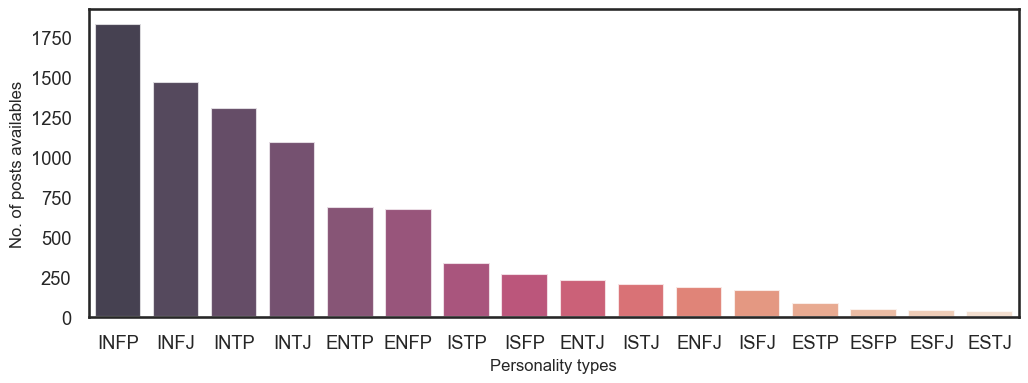

In [8]:
sns.set_theme(style="white", context="talk",font_scale=0.8)
cnt_srs = data['type'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, palette="rocket", alpha=0.8)
plt.xlabel('Personality types', fontsize=12)
plt.ylabel('No. of posts availables', fontsize=12)
plt.show()

### Preparing and fiting the model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data['lemmatized_text'], data['type'], test_size=0.2, random_state=42)

In [11]:
model = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression(max_iter=500, random_state=42, solver='liblinear'))])
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf',
                 LogisticRegression(max_iter=500, random_state=42,
                                    solver='liblinear'))])

In [12]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy: 0.5654178674351585
Precision: 0.5528573197447372
Recall: 0.5654178674351585
F1-Score: 0.5111819745732816
              precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00        41
        ENFP       0.67      0.46      0.54       125
        ENTJ       1.00      0.09      0.17        44
        ENTP       0.71      0.44      0.55       135
        ESFJ       0.00      0.00      0.00         7
        ESFP       0.00      0.00      0.00         8
        ESTJ       0.00      0.00      0.00         7
        ESTP       0.00      0.00      0.00        15
        INFJ       0.58      0.65      0.61       288
        INFP       0.49      0.88      0.63       370
        INTJ       0.58      0.63      0.60       193
        INTP       0.62      0.74      0.67       293
        ISFJ       1.00      0.04      0.09        45
        ISFP       0.00      0.00      0.00        53
        ISTJ       0.00      0.00      0.00        44
        ISTP       0

c:\Users\svcsc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\svcsc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\svcsc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

## Prediction

In [13]:
new_data = ["This is a new document to classify."]
new_data_clean = [clean_text(doc) for doc in new_data]  # Cleaning new data

# Making predictions
print("Prediction:", model.predict(new_data_clean))

Prediction: ['INTP']


In [14]:
hatespeech = pd.read_csv('MeTooHate.csv', sep=",", lineterminator='\n')
hatespeech['cleaned_text'] = hatespeech['text'].apply(lambda x: clean_text(str(x)))
hatespeech['bracket_text'] = hatespeech['cleaned_text'].apply(lambda x: (str(x).split('\n')))

In [15]:
hatespeech['type'] = hatespeech['bracket_text'].apply(lambda x: model.predict((x)))

In [16]:
hatespeech.drop(columns=["status_id", 'created_at', 'location', 'cleaned_text', 'bracket_text'])

,status_id,text,created_at,favorite_count,retweet_count,location,followers_count,friends_count,statuses_count,category\r,cleaned_text,bracket_text,type
0,1046207313588236290,"Entitled, obnoxious, defensive, lying weasel. ...",2018-09-30T01:17:15Z,5,1,"McAllen, TX",2253,2303,23856,0,"entitled, obnoxious, defensive, lying weasel. ...","[entitled, obnoxious, defensive, lying weasel....",[INTP]
1,1046207328113086464,Thank you and for what you did for the women...,2018-09-30T01:17:19Z,5,2,"Tampa, FL",2559,4989,19889,0,thank you and for what you did for the women...,[thank you and for what you did for the wome...,"[INFP, INTP]"
2,1046207329589493760,Knitting (s) &amp; getting ready for January 1...,2018-09-30T01:17:19Z,0,0,"St Cloud, MN",16,300,9,0,knitting (s) &amp; getting ready for january 1...,[knitting (s) &amp; getting ready for january ...,[INTJ]
3,1046207341283168256,Yep just like triffeling women weaponized thei...,2018-09-30T01:17:22Z,1,0,flyover country,3573,3732,38361,1,yep just like triffeling women weaponized thei...,[yep just like triffeling women weaponized the...,[INTP]
4,1046207347016826880,"No, the President wants to end movement posin...",2018-09-30T01:17:23Z,0,0,World,294,312,7635,0,"no, the president wants to end movement posin...","[no, the president wants to end movement posi...",[INTP]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
807169,1097646408608505856,Let’s not forget that this “iconic kiss” was u...,2019-02-18T23:57:51Z,2,0,South Florida,206,412,1247,0,let’s not forget that this “iconic kiss” was u...,[let’s not forget that this “iconic kiss” was ...,[INTP]
807170,1097646574686126081,DEFINITELY....the only one any of us should su...,2019-02-18T23:58:31Z,3,0,NaN,63,6,137,0,definitely....the only one any of us should su...,[definitely....the only one any of us should s...,"[INTP, INTP]"
807171,1097646591882809350,Did the movement count the dollars of Erin An...,2019-02-18T23:58:35Z,0,0,Philly,2721,3509,66966,0,did the movement count the dollars of erin an...,[did the movement count the dollars of erin a...,[INTP]
807172,1097646692877381632,This is one of my all time fav songs &amp; vid...,2019-02-18T23:58:59Z,1,1,"Berlin, Deutschland",2683,1011,15455,1,this is one of my all time fav songs &amp; vid...,[this is one of my all time fav songs &amp; vi...,[INFP]


In [17]:
hatespeech.to_csv('hatespeech_results.csv')

In [23]:
hatespeech['type'].astype(str).value_counts()

type
['INTP']                                                                                                 412278
['INFP']                                                                                                  95806
['INTJ']                                                                                                  76349
['INTP' 'INTP']                                                                                           42302
['INTP' 'INTP' 'INTP']                                                                                    39915
                                                                                                          ...  
['INTP' 'INTP' 'ENTP' 'INTJ' 'INTP' 'INTP' 'INTP' 'INTP' 'INFP' 'INTP'\n 'INTP']                              1
['INTP' 'INTP' 'INTP' 'INTP' 'INTP' 'INTP' 'INTP' 'INFP' 'INTP' 'INTJ'\n 'INTP' 'INTP' 'INTP' 'INFP']         1
['INTJ' 'INTJ' 'INTJ' 'INTJ' 'INTP' 'INTP' 'INTP']                                                 

In [3]:
hatespeech = pd.read_csv('hatespeech_results.csv').drop(columns=["status_id", 'created_at', 'location', 'cleaned_text', 'bracket_text'])

In [4]:
len(hatespeech['type'][0])

8

In [14]:
min_words = 3
new_df = hatespeech.copy()
new_df["no. of. words_type"] = new_df["type"].astype(str).apply(lambda x: len(re.findall(r'\w+', x)))
new_df = new_df[new_df["no. of. words_type"] <= min_words]
new_df

,Unnamed: 0,text,favorite_count,retweet_count,followers_count,friends_count,statuses_count,category\r,type,no. of. words_type
0,0,"Entitled, obnoxious, defensive, lying weasel. ...",5,1,2253,2303,23856,0,['INTP'],1
1,1,Thank you and for what you did for the women...,5,2,2559,4989,19889,0,['INFP' 'INTP'],2
2,2,Knitting (s) &amp; getting ready for January 1...,0,0,16,300,9,0,['INTJ'],1
3,3,Yep just like triffeling women weaponized thei...,1,0,3573,3732,38361,1,['INTP'],1
4,4,"No, the President wants to end movement posin...",0,0,294,312,7635,0,['INTP'],1
...,...,...,...,...,...,...,...,...,...,...
807169,807169,Let’s not forget that this “iconic kiss” was u...,2,0,206,412,1247,0,['INTP'],1
807170,807170,DEFINITELY....the only one any of us should su...,3,0,63,6,137,0,['INTP' 'INTP'],2
807171,807171,Did the movement count the dollars of Erin An...,0,0,2721,3509,66966,0,['INTP'],1
807172,807172,This is one of my all time fav songs &amp; vid...,1,1,2683,1011,15455,1,['INFP'],1
